## 1. MLP

page 61

In [1]:
import sys
sys.path.append("../gluon-tutorials-zh")
import gluonbook as gb
from mxnet import gluon, init, nd
from mxnet.gluon import loss as gloss, nn

%matplotlib inline

In [2]:
def xyplot(x_vals, y_vals, x_label, y_label):
    %config InlineBackend.figure_format = "retina"
    gb.plt.rcParams['figure.figsize'] = (3.5, 2.5)
    gb.plt.plot(x_vals, y_vals)
    gb.plt.xlabel(x_label)
    gb.plt.ylabel(y_label)

In [3]:
x = nd.arange(-5.0, 5.0, 0.1)

### Relu

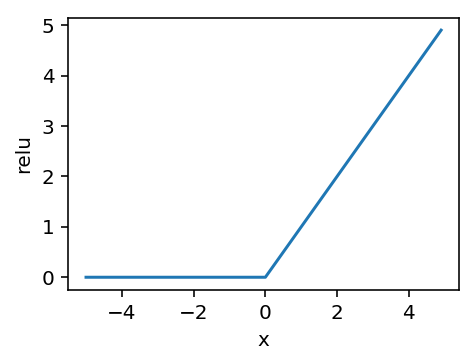

In [4]:
xyplot(x.asnumpy(), x.relu().asnumpy(), 'x', 'relu')

### Sigmoid

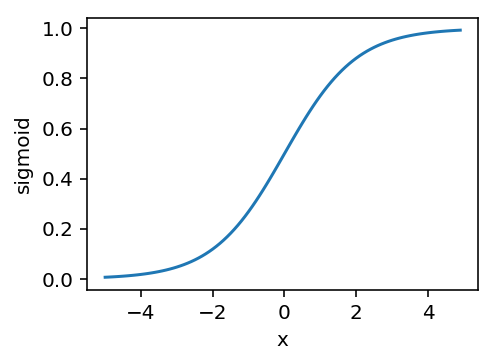

In [5]:
xyplot(x.asnumpy(), x.sigmoid().asnumpy(), 'x', 'sigmoid')

### Tanh

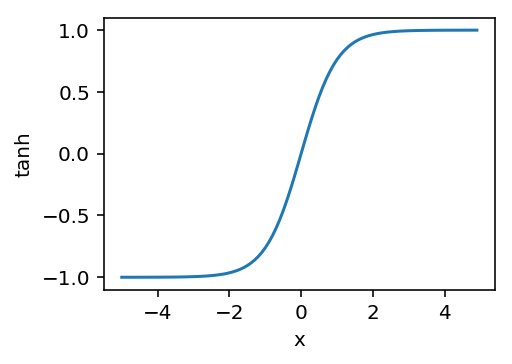

In [6]:
xyplot(x.asnumpy(), x.tanh().asnumpy(), 'x', 'tanh')

## 2. Manual MLP

page 68

In [7]:
from mxnet.gluon import loss as gloss

In [8]:
batch_size = 256
train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)

In [9]:
num_inputs = 784
num_ouputs = 10
num_hiddens = 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_ouputs))
b2 = nd.zeros(num_ouputs)
params = [W1, b1, W2, b2]
for param in params:
    param.attach_grad()

In [10]:
def relu(X):
    """
    manually for max(X, 0)
    """
    return nd.maximum(X, 0)

In [11]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

In [12]:
loss = gloss.SoftmaxCrossEntropyLoss()
num_epochs = 10
lr = 0.5
gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.7802, train acc 0.709, test acc 0.812
epoch 2, loss 0.4887, train acc 0.819, test acc 0.847
epoch 3, loss 0.4212, train acc 0.844, test acc 0.862
epoch 4, loss 0.3906, train acc 0.855, test acc 0.867
epoch 5, loss 0.3698, train acc 0.865, test acc 0.868
epoch 6, loss 0.3534, train acc 0.870, test acc 0.877
epoch 7, loss 0.3323, train acc 0.878, test acc 0.879
epoch 8, loss 0.3235, train acc 0.881, test acc 0.883
epoch 9, loss 0.3134, train acc 0.884, test acc 0.882
epoch 10, loss 0.3053, train acc 0.887, test acc 0.886


## 3.  Gluon MLP

page 71

In [13]:
from mxnet import gluon, init
from mxnet.gluon import loss as gloass, nn

In [14]:
net = nn.Sequential()
net.add(nn.Dense(num_hiddens, activation='relu'))
net.add(nn.Dense(num_ouputs))
net.initialize(init.Normal(sigma=0.01))

In [15]:
batch_size = 256
train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 10
gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 2.3035, train acc 0.076, test acc 0.074
epoch 2, loss 2.3035, train acc 0.076, test acc 0.074
epoch 3, loss 2.3036, train acc 0.076, test acc 0.074
epoch 4, loss 2.3036, train acc 0.076, test acc 0.074
epoch 5, loss 2.3036, train acc 0.076, test acc 0.074
epoch 6, loss 2.3036, train acc 0.076, test acc 0.074
epoch 7, loss 2.3036, train acc 0.076, test acc 0.074
epoch 8, loss 2.3036, train acc 0.076, test acc 0.074
epoch 9, loss 2.3036, train acc 0.076, test acc 0.074
epoch 10, loss 2.3036, train acc 0.076, test acc 0.074


## 4. Overfitting, underfitting and Model Selection

page 72